**NAME - Ilamparithi venkatesan** **21031288**

In [ ]:
pip install wbgapi

In [1]:
import pandas as pd
import wbgapi as wb

In [2]:
GDP_indc = ['SL.UEM.1524.FE.ZS','NY.GDP.MKTP.CD','SL.TLF.CACT.NE.ZS','SP.POP.TOTL']
contry_cde = ["IND","BRA",'AFG','AUS','JPN','ESP','CHN','CHE','BGD','ARG']
CLI_indc=['EN.ATM.GHGT.KT.CE','EN.ATM.CO2E.PC','EG.ELC.RNWX.KH','EG.ELC.ACCS.ZS']
GDP_set  = wb.data.DataFrame(GDP_indc, contry_cde, mrv=7)
CLI_set = wb.data.DataFrame(CLI_indc, contry_cde, mrv=7)
#SL.UEM.1524.FE.ZS: Unemployment of total female as a percentage
#NY.GDP.MKTP.CD: Current GDP in USD
#SL.TLF.CACT.NE.ZS: total labour participation rate aged 15+
#SP.POP.TOTL: Total population
#EN.ATM.GHGT.KT.CE: Greenshouse gas rate of emission
#EN.ATM.CO2E.PC:	CO2 emissions (metric tons per capita)
#EG.ELC.RNWX.KH	Electricity production from renewable sources, excluding hydroelectric (kWh)
#EG.ELC.ACCS.ZS: Access to electricity as a %

In [3]:
# GDP data for the countries specified
GDP_set.columns = [x.replace('YR','') for x in GDP_set.columns]      
GDP_set=GDP_set.stack().unstack(level=1)                             
GDP_set.index.names = ['Contry_Cde', 'Year']                           
GDP_set.columns                                                     
GDP_set.fillna(0)
GDP_set.head(10)

series           NY.GDP.MKTP.CD  SL.TLF.CACT.NE.ZS  SL.UEM.1524.FE.ZS  \
Contry_Cde Year                                                         
AFG        2015    1.913421e+10                NaN          21.479000   
           2016    1.811656e+10                NaN          21.386000   
           2017    1.875347e+10          47.310001          21.292000   
           2018    1.805323e+10                NaN          21.243999   
           2019    1.879945e+10                NaN          21.337000   
           2020    2.011614e+10          41.580002          21.333000   
ARG        2015    5.947493e+11                NaN          23.636999   
           2016    5.575314e+11                NaN          25.671000   
           2017    6.436287e+11          58.810001          26.959000   
           2018    5.248197e+11          59.599998          27.870001   

series           SP.POP.TOTL  
Contry_Cde Year               
AFG        2015   34413603.0  
           2016   35383028.0  
           2017   36296111.0  
           2018   37171922.0  
           2019   38041757.0  
           2020   38928341.0  
ARG        2015   43131966.0  
           2016   43590368.0  
           2017   44044811.0  
           2018   44494502.0

In [4]:
# Climate data for the countries specified
CLI_set.columns = [y.replace('YR','') for y in CLI_set.columns]      
CLI_set=CLI_set.stack().unstack(level=1)                             
CLI_set.index.names = ['Contry_Cde', 'Year']                           
CLI_set.columns                                                     
CLI_set.fillna(0)
CLI_set.head(10)

series           EG.ELC.ACCS.ZS  EG.ELC.RNWX.KH  EN.ATM.CO2E.PC  \
Contry_Cde Year                                                   
AFG        2014       89.500000             NaN        0.234037   
           2015       71.500000             NaN        0.232176   
           2016       97.699997             NaN        0.208857   
           2017       97.699997             NaN        0.203328   
           2018       96.616135             NaN        0.200151   
           2019       97.699997             NaN             NaN   
           2020       97.699997             NaN             NaN   
ARG        2014      100.000000    2.719000e+09        4.216361   
           2015       99.625389    2.752000e+09        4.314434   
           2016       99.849579             NaN        4.227539   

series           EN.ATM.GHGT.KT.CE  
Contry_Cde Year                     
AFG        2014            84620.0  
           2015            93730.0  
           2016            95370.0  
           2017            97300.0  
           2018            98920.0  
           2019                NaN  
           2020                NaN  
ARG        2014           356100.0  
           2015           362560.0  
           2016           366370.0

In [5]:
#Dataset- Making ready for joining
text1=GDP_set.reset_index()
text2=CLI_set.reset_index()
text3=text1.fillna(0)
text4=text2.fillna(0)

In [6]:
#Joining the values
text_final = pd.merge(text3, text4)
text_final.head(7)

series,Contry_Cde,Year,NY.GDP.MKTP.CD,SL.TLF.CACT.NE.ZS,SL.UEM.1524.FE.ZS,SP.POP.TOTL,EG.ELC.ACCS.ZS,EG.ELC.RNWX.KH,EN.ATM.CO2E.PC,EN.ATM.GHGT.KT.CE
0,AFG,2015,1.913421e+10,0.000000,21.479000,34413603.0,71.500000,0.000000e+00,0.232176,93730.0
1,AFG,2016,1.811656e+10,0.000000,21.386000,35383028.0,97.699997,0.000000e+00,0.208857,95370.0
2,AFG,2017,1.875347e+10,47.310001,21.292000,36296111.0,97.699997,0.000000e+00,0.203328,97300.0
3,AFG,2018,1.805323e+10,0.000000,21.243999,37171922.0,96.616135,0.000000e+00,0.200151,98920.0
4,AFG,2019,1.879945e+10,0.000000,21.337000,38041757.0,97.699997,0.000000e+00,0.000000,0.0
5,AFG,2020,2.011614e+10,41.580002,21.333000,38928341.0,97.699997,0.000000e+00,0.000000,0.0
6,ARG,2015,5.947493e+11,0.000000,23.636999,43131966.0,99.625389,2.752000e+09,4.314434,362560.0


In [8]:
# Information - India
txt1=text_final[(text_final['Contry_Cde']=='IND')]
txt1.describe()

series,NY.GDP.MKTP.CD,SL.TLF.CACT.NE.ZS,SL.UEM.1524.FE.ZS,SP.POP.TOTL,EG.ELC.ACCS.ZS,EG.ELC.RNWX.KH,EN.ATM.CO2E.PC,EN.ATM.GHGT.KT.CE
count,6.000000e+00,6.000000,6.000000,6.000000e+00,6.000000,6.000000e+00,6.000000,6.000000e+00
mean,2.443434e+12,16.020000,23.176833,1.331335e+09,91.097585,2.351233e+10,1.409650,2.636743e+06
std,3.444180e+11,24.818129,0.964430,2.649838e+07,5.142426,3.649648e+10,0.693283,1.297599e+06
min,2.039127e+12,0.000000,21.739000,1.295601e+09,83.585213,0.000000e+00,0.000000,0.000000e+00
25%,2.151390e+12,0.000000,22.577500,1.313744e+09,88.383720,0.000000e+00,1.642989,3.052505e+06
50%,2.473135e+12,0.000000,23.340000,1.331597e+09,90.995857,0.000000e+00,1.648843,3.083380e+06
75%,2.688702e+12,35.985000,23.877501,1.349151e+09,94.509182,5.019825e+10,1.701725,3.198218e+06
max,2.870504e+12,48.139999,24.261999,1.366418e+09,97.815285,7.414300e+10,1.799825,3.374990e+06


**The average total access to electricity for the whole population in India is 91.09%**

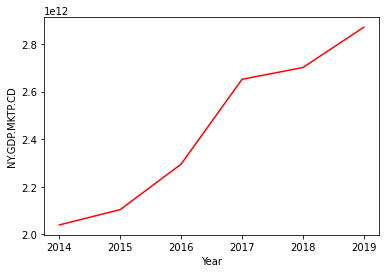

In [14]:
# Line Graph visualisation for GDP in India
import matplotlib.pyplot as plt
plt.plot(txt1["Year"], txt1["NY.GDP.MKTP.CD"],color="red")
plt.xlabel("Year")
plt.ylabel("NY.GDP.MKTP.CD")
plt.show()

In [16]:
# Information - Brazil
txt2=text_final[(text_final['Contry_Cde']=='BRA')]
txt2.describe()

series,NY.GDP.MKTP.CD,SL.TLF.CACT.NE.ZS,SL.UEM.1524.FE.ZS,SP.POP.TOTL,EG.ELC.ACCS.ZS,EG.ELC.RNWX.KH,EN.ATM.CO2E.PC,EN.ATM.GHGT.KT.CE
count,6.000000e+00,6.000000,6.000000,6.000000e+00,6.000000,6.000000e+00,6.000000,6.000000e+00
mean,1.985370e+12,63.776667,28.307500,2.069585e+08,99.726858,2.145133e+10,1.866087,8.896417e+05
std,2.503654e+11,0.305723,5.840282,3.105461e+06,0.060442,3.345787e+10,0.928634,4.365621e+05
min,1.795693e+12,63.480000,18.701000,2.027637e+08,99.650247,0.000000e+00,0.000000,0.000000e+00
25%,1.821115e+12,63.557499,25.311999,2.048946e+08,99.700000,0.000000e+00,2.067280,1.037402e+06
50%,1.897379e+12,63.745001,31.324500,2.069984e+08,99.705451,0.000000e+00,2.153960,1.058305e+06
75%,2.026869e+12,63.842501,31.949001,2.090604e+08,99.777726,4.366575e+10,2.301630,1.078255e+06
max,2.456044e+12,64.320000,33.029999,2.110495e+08,99.800000,7.048700e+10,2.499362,1.105900e+06


**The average access to electricity for Brazil is more than that of India.The average unemployment of female between the age of 15 to 24 years in Brazil is higher than that of India**

<AxesSubplot:xlabel='Year'>

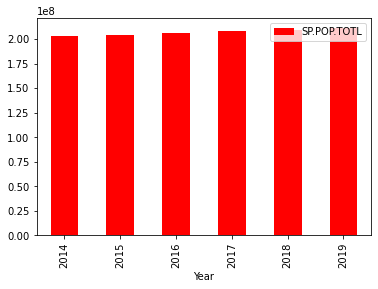

In [18]:
# Bar graph visualisation for total population in Brazil
txt2.plot(x="Year", y="SP.POP.TOTL", kind="bar",color="red")

In [19]:
# Information - Afghanistan
txt3=text_final[(text_final['Contry_Cde']=='AFG')]
txt3.describe()

series,NY.GDP.MKTP.CD,SL.TLF.CACT.NE.ZS,SL.UEM.1524.FE.ZS,SP.POP.TOTL,EG.ELC.ACCS.ZS,EG.ELC.RNWX.KH,EN.ATM.CO2E.PC,EN.ATM.GHGT.KT.CE
count,6.000000e+00,6.000000,6.000000,6.000000e+00,6.000000,6.0,6.000000,6.000000
mean,1.889234e+10,16.506667,21.403166,3.577954e+07,92.135937,0.0,0.179758,78323.333333
std,8.908080e+08,25.610189,0.158308,1.740587e+06,10.667321,0.0,0.089247,38694.917840
min,1.805323e+10,0.000000,21.243999,3.337080e+07,71.500000,0.0,0.000000,0.000000
25%,1.827579e+10,0.000000,21.303250,3.465596e+07,91.550000,0.0,0.200945,86897.500000
50%,1.877646e+10,0.000000,21.361500,3.583957e+07,97.700000,0.0,0.206092,94550.000000
75%,1.905052e+10,35.482501,21.455750,3.695297e+07,97.700000,0.0,0.226346,96817.500000
max,2.049713e+10,51.730000,21.681000,3.804176e+07,98.715622,0.0,0.234037,98920.000000


**The average access to electricity for Afghanistan is more than that of India but less than that of Brazil. The average Greenshouse gas rate of emission is lower than India and Brazil**

<AxesSubplot:xlabel='Year'>

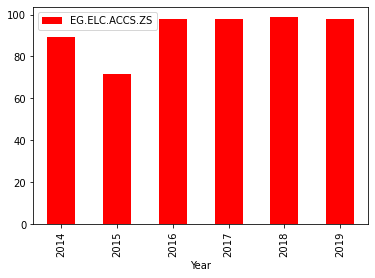

In [20]:
# Bar graph visualisation for electricity access in Afghanistan
txt3.plot(x="Year", y="EG.ELC.ACCS.ZS", kind="bar",color="red")

In [21]:
# Information - Australia
txt4=text_final[(text_final['Contry_Cde']=='AUS')]
txt4.describe()

series,NY.GDP.MKTP.CD,SL.TLF.CACT.NE.ZS,SL.UEM.1524.FE.ZS,SP.POP.TOTL,EG.ELC.ACCS.ZS,EG.ELC.RNWX.KH,EN.ATM.CO2E.PC,EN.ATM.GHGT.KT.CE
count,6.000000e+00,6.000000,6.000000,6.000000e+00,6.0,6.000000e+00,6.000000,6.000000
mean,1.362015e+12,65.219999,11.428500,2.440548e+07,100.0,6.611000e+09,13.104761,499440.000000
std,9.158821e+10,0.478497,0.686188,7.144080e+05,0.0,1.027032e+10,6.421379,245248.455816
min,1.206685e+12,64.699997,10.630000,2.347569e+07,100.0,0.000000e+00,0.000000,0.000000
25%,1.332796e+12,64.902502,10.889250,2.390972e+07,100.0,0.000000e+00,15.541299,578417.500000
50%,1.371243e+12,65.084999,11.454000,2.439638e+07,100.0,0.000000e+00,15.747262,594040.000000
75%,1.419385e+12,65.514997,11.793000,2.488748e+07,100.0,1.396650e+10,15.778806,610180.000000
max,1.467505e+12,65.949997,12.426000,2.536574e+07,100.0,2.104400e+10,15.872080,619790.000000


**The average total population in Australia is lower than that of Afghanistan, Brazil and India. The average total labor force participation rate for people aged 15+ is more than that of Afghanistan, Brazil and India** 

<AxesSubplot:xlabel='Year', ylabel='SL.TLF.CACT.NE.ZS'>

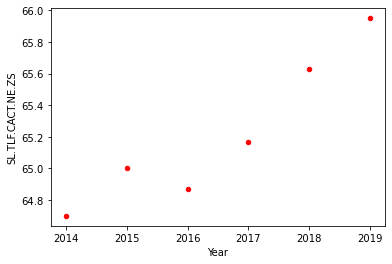

In [23]:
# Scatter Plot for total Labor force participation rate for 15+ in Australia
txt4.plot(x="Year", y="SL.TLF.CACT.NE.ZS", kind="scatter",color="red")

In [7]:
# Information - Japan
txt5=text_final[(text_final['Contry_Cde']=='JPN')]
txt5.describe()

series,NY.GDP.MKTP.CD,SL.TLF.CACT.NE.ZS,SL.UEM.1524.FE.ZS,SP.POP.TOTL,EG.ELC.ACCS.ZS,EG.ELC.RNWX.KH,EN.ATM.CO2E.PC,EN.ATM.GHGT.KT.CE
count,6.000000e+00,6.000000,6.000000,6.000000e+00,6.0,6.000000e+00,6.000000,6.000000e+00
mean,4.937146e+12,60.921666,4.194000,1.265919e+08,100.0,1.338200e+10,6.057445,8.241567e+05
std,2.514075e+11,1.096073,0.702404,4.864994e+05,0.0,3.277907e+10,4.695911,6.389748e+05
min,4.444931e+12,59.500000,3.051000,1.258360e+08,100.0,0.000000e+00,0.000000,0.000000e+00
25%,4.949047e+12,60.102501,3.932250,1.263310e+08,100.0,0.000000e+00,2.185564,2.966925e+05
50%,5.020285e+12,60.969999,4.336500,1.266574e+08,100.0,0.000000e+00,8.913948,1.211070e+06
75%,5.052542e+12,61.875000,4.462500,1.269423e+08,100.0,0.000000e+00,9.189366,1.252140e+06
max,5.148782e+12,62.099998,5.138000,1.271410e+08,100.0,8.029200e+10,9.292832,1.265070e+06


**The average total GDP of Japan is higher than that of India, Brazil, and Australia. The average electricity production from renewable sources, excluding hydroelectric in kWh is higher than India, Brazil and Australia**

<AxesSubplot:xlabel='Year', ylabel='EN.ATM.GHGT.KT.CE'>

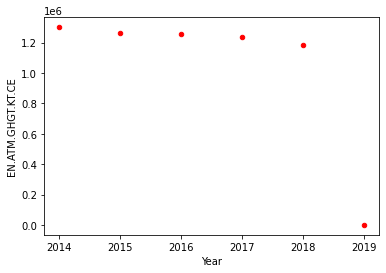

In [26]:
# Scatter Plot visualisation for greenhouse emission in Japan
txt5.plot(x="Year", y="EN.ATM.GHGT.KT.CE", kind="scatter",color="red")

In [27]:
# Information - Spain
txt6=text_final[(text_final['Contry_Cde']=='ESP')]
txt6.describe()

series,NY.GDP.MKTP.CD,SL.TLF.CACT.NE.ZS,SL.UEM.1524.FE.ZS,SP.POP.TOTL,EG.ELC.ACCS.ZS,EG.ELC.RNWX.KH,EN.ATM.CO2E.PC,EN.ATM.GHGT.KT.CE
count,6.000000e+00,6.000000,6.000000,6.000000e+00,6.0,6.000000e+00,6.000000,6.000000
mean,1.319873e+12,58.371667,41.859667,4.665571e+07,100.0,2.334133e+10,4.531783,269233.333333
std,9.085856e+10,0.451727,7.923910,2.671630e+05,0.0,3.616664e+10,2.226391,132065.133425
min,1.195119e+12,57.919998,33.326000,4.644483e+07,100.0,0.000000e+00,0.000000,0.000000
25%,1.251381e+12,57.967499,35.304002,4.648168e+07,100.0,0.000000e+00,5.216624,315170.000000
50%,1.339348e+12,58.315001,41.178001,4.653865e+07,100.0,0.000000e+00,5.416119,320670.000000
75%,1.387134e+12,58.752501,47.208001,4.674662e+07,100.0,5.171100e+10,5.519749,326582.500000
max,1.420300e+12,58.930000,52.911999,4.713352e+07,100.0,7.110000e+10,5.654040,332170.000000


**The average total labor force participation rate for people aged 15+ is lower than that of Japan, Brazil and Australia. The average CO2 emissions in metric tons per capita is lower than that of Japan, and Australia**

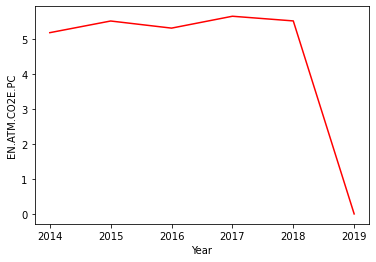

In [28]:
# Line Graph visualisation for 	CO2 emissions (metric tons per capita) in Spain
plt.plot(txt6["Year"], txt6["EN.ATM.CO2E.PC"],color="red")
plt.xlabel("Year")
plt.ylabel("EN.ATM.CO2E.PC")
plt.show()

In [29]:
# Information - China
txt7=text_final[(text_final['Contry_Cde']=='CHN')]
txt7.describe()

series,NY.GDP.MKTP.CD,SL.TLF.CACT.NE.ZS,SL.UEM.1524.FE.ZS,SP.POP.TOTL,EG.ELC.ACCS.ZS,EG.ELC.RNWX.KH,EN.ATM.CO2E.PC,EN.ATM.GHGT.KT.CE
count,6.000000e+00,6.000000,6.000000,6.000000e+00,6.0,6.000000e+00,6.000000,6.000000e+00
mean,1.220928e+13,35.368333,9.390667,1.391038e+09,100.0,8.561517e+10,5.989354,9.999178e+06
std,1.575697e+12,38.744163,0.196475,1.375953e+07,0.0,1.337296e+11,2.935716,4.902411e+06
min,1.047568e+13,0.000000,9.054000,1.371860e+09,100.0,0.000000e+00,0.000000,0.000000e+00
25%,1.110448e+13,0.000000,9.338750,1.381842e+09,100.0,0.000000e+00,7.084980,1.185771e+07
50%,1.177184e+13,35.314999,9.403000,1.392002e+09,100.0,0.000000e+00,7.149585,1.186230e+07
75%,1.349872e+13,70.675001,9.512250,1.401124e+09,100.0,1.723800e+11,7.203331,1.200986e+07
max,1.427994e+13,70.889999,9.618000,1.407745e+09,100.0,2.838510e+11,7.352263,1.235524e+07


**The average total population of China is higher than that of India, Spain, Japan and Australia. The average greenshouse gas rate of emission is higher than that of Spain, Japan, Australia and Brazil**

<AxesSubplot:xlabel='Year', ylabel='SP.POP.TOTL'>

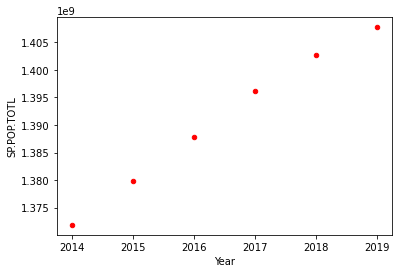

In [30]:
# Scatter Plot visualisation for total population in China
txt7.plot(x="Year", y="SP.POP.TOTL", kind="scatter",color="red")

In [31]:
# Information - Switzerland
txt8=text_final[(text_final['Contry_Cde']=='CHE')]
txt8.describe()

series,NY.GDP.MKTP.CD,SL.TLF.CACT.NE.ZS,SL.UEM.1524.FE.ZS,SP.POP.TOTL,EG.ELC.ACCS.ZS,EG.ELC.RNWX.KH,EN.ATM.CO2E.PC,EN.ATM.GHGT.KT.CE
count,6.000000e+00,6.000000,6.000000,6.000000e+00,6.0,6.000000e+00,6.000000,6.000000
mean,7.173220e+11,68.296669,7.985167,8.397639e+06,100.0,9.145000e+08,3.877691,39598.333333
std,1.843397e+10,0.246711,0.574834,1.453678e+05,0.0,1.418429e+09,1.905930,19418.411281
min,6.956007e+11,67.910004,7.153000,8.188649e+06,100.0,0.000000e+00,0.000000,0.000000
25%,7.027318e+11,68.170002,7.571750,8.305132e+06,100.0,0.000000e+00,4.443848,46315.000000
50%,7.181230e+11,68.335003,8.185000,8.412589e+06,100.0,0.000000e+00,4.640912,47455.000000
75%,7.337393e+11,68.470003,8.399250,8.498707e+06,100.0,1.975500e+09,4.725969,48070.000000
max,7.355393e+11,68.570000,8.550000,8.575280e+06,100.0,2.853000e+09,4.851838,48470.000000


**The average unemployment of female between the age of 15 to 24 years in Switzerland is less than that of China, Spain, Australia and Afghanistan. The average electricity production from renewable sources, excluding hydroelectric in kWh is lower than that of China, Spain, Japan and Australia**

<AxesSubplot:xlabel='Year'>

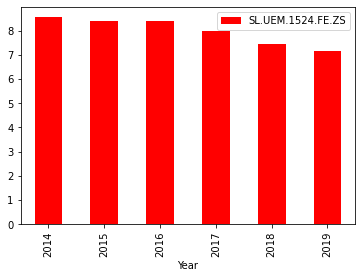

In [32]:
# Bar graph visualisation for female unemployment in Switzerland
txt8.plot(x="Year", y="SL.UEM.1524.FE.ZS", kind="bar",color="red")

In [34]:
# Information - Bangladesh
txt9=text_final[(text_final['Contry_Cde']=='BGD')]
txt9.describe()

series,NY.GDP.MKTP.CD,SL.TLF.CACT.NE.ZS,SL.UEM.1524.FE.ZS,SP.POP.TOTL,EG.ELC.ACCS.ZS,EG.ELC.RNWX.KH,EN.ATM.CO2E.PC,EN.ATM.GHGT.KT.CE
count,6.000000e+00,6.000000,6.000000,6.000000e+00,6.000000,6.000000e+00,6.000000,6.000000
mean,2.359501e+11,19.070000,14.845833,1.588099e+08,80.793346,5.116667e+07,0.390703,155166.666667
std,4.886184e+10,29.551608,2.200410,3.191901e+06,11.879585,7.931814e+07,0.194385,76518.077254
min,1.728855e+11,0.000000,11.744000,1.545174e+08,62.400000,0.000000e+00,0.000000,0.000000
25%,2.016628e+11,0.000000,13.279000,1.566865e+08,74.810059,0.000000e+00,0.424373,175782.500000
50%,2.355631e+11,0.000000,15.375500,1.588313e+08,81.960000,0.000000e+00,0.462787,183050.000000
75%,2.679570e+11,42.067500,16.692750,1.609539e+08,90.850000,1.117500e+08,0.486374,190190.000000
max,3.025713e+11,58.330002,16.868000,1.630462e+08,92.200000,1.580000e+08,0.512837,198970.000000


**The average total access to electricity in Bangladesh is lower than that of India, China, Japan and Switzerland. The average total population in Bangladesh is higher than that of Switzerland, Spain and Japan.**

<AxesSubplot:xlabel='Year', ylabel='EG.ELC.ACCS.ZS'>

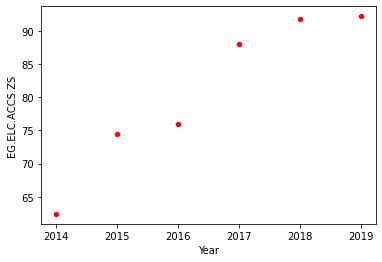

In [35]:
# Scatter Plot visualisation for electricity access in Bangladesh
txt9.plot(x="Year", y="EG.ELC.ACCS.ZS", kind="scatter",color="red")

In [36]:
# Information - Argentina
txt10=text_final[(text_final['Contry_Cde']=='ARG')]
txt10.describe()

series,NY.GDP.MKTP.CD,SL.TLF.CACT.NE.ZS,SL.UEM.1524.FE.ZS,SP.POP.TOTL,EG.ELC.ACCS.ZS,EG.ELC.RNWX.KH,EN.ATM.CO2E.PC,EN.ATM.GHGT.KT.CE
count,6.000000e+00,6.000000,6.000000,6.000000e+00,6.000000,6.000000e+00,6.000000,6.000000
mean,5.498302e+11,39.690000,25.826000,4.381164e+07,99.961283,9.118333e+08,3.472507,303000.000000
std,6.578365e+10,30.747348,2.434253,8.492776e+05,0.075371,1.412645e+09,1.705059,148495.013654
min,4.519324e+11,0.000000,22.327000,4.266950e+07,99.811684,0.000000e+00,0.000000,0.000000
25%,5.251947e+11,14.702500,24.145499,4.324657e+07,99.967012,0.000000e+00,4.012794,357715.000000
50%,5.419255e+11,59.125000,26.315000,4.381759e+07,100.000000,0.000000e+00,4.152916,364105.000000
75%,5.854448e+11,59.559999,27.642251,4.438208e+07,100.000000,2.039250e+09,4.224745,366190.000000
max,6.436287e+11,60.290001,28.492001,4.493871e+07,100.000000,2.752000e+09,4.314434,367320.000000


**The average total access to electricity is lower than 100% and it is lower than that of China, Japan and Switzerland. The average current GDP is USD is lower than that of Switzerland, China, Spain, Japan and India**

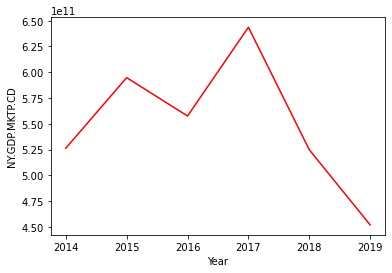

In [37]:
# Line Graph visualisation for GDP in Argentina
plt.plot(txt10["Year"], txt10["NY.GDP.MKTP.CD"],color="red")
plt.xlabel("Year")
plt.ylabel("NY.GDP.MKTP.CD")
plt.show()

**CORRELATION- JAPAN**

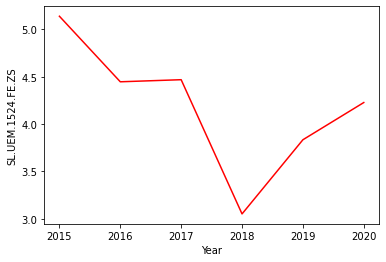

In [9]:
#GDP_indc = ['SL.UEM.1524.FE.ZS','NY.GDP.MKTP.CD','SL.TLF.CACT.NE.ZS','SP.POP.TOTL']
import matplotlib.pyplot as plt

plt.plot(txt5["Year"], txt5["SL.UEM.1524.FE.ZS"],color="red")
plt.xlabel("Year")
plt.ylabel("SL.UEM.1524.FE.ZS")
plt.show()

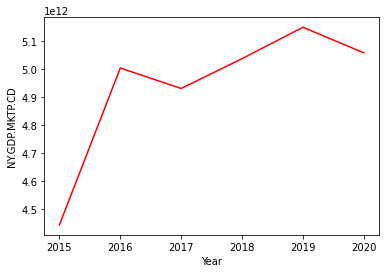

In [10]:
plt.plot(txt5["Year"], txt5["NY.GDP.MKTP.CD"],color="red")
plt.xlabel("Year")
plt.ylabel("NY.GDP.MKTP.CD")
plt.show()

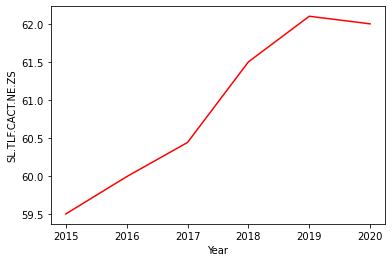

In [11]:
plt.plot(txt5["Year"], txt5["SL.TLF.CACT.NE.ZS"],color="red")
plt.xlabel("Year")
plt.ylabel("SL.TLF.CACT.NE.ZS")
plt.show()

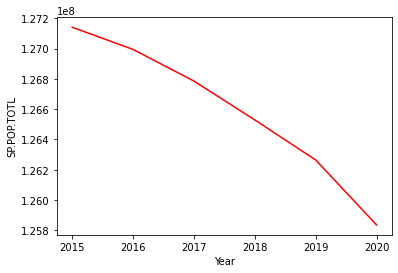

In [12]:
plt.plot(txt5["Year"], txt5["SP.POP.TOTL"],color="red")
plt.xlabel("Year")
plt.ylabel("SP.POP.TOTL")
plt.show()

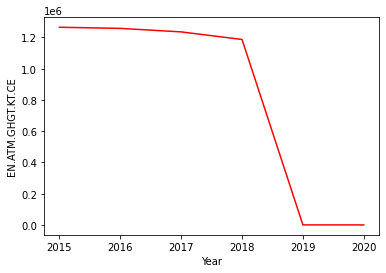

In [13]:
plt.plot(txt5["Year"], txt5["EN.ATM.GHGT.KT.CE"],color="red")
plt.xlabel("Year")
plt.ylabel("EN.ATM.GHGT.KT.CE")
plt.show()

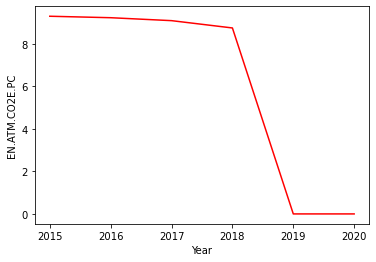

In [14]:
#CLI_indc=['EN.ATM.GHGT.KT.CE','EN.ATM.CO2E.PC','EG.ELC.RNWX.KH','EG.ELC.ACCS.ZS']
plt.plot(txt5["Year"], txt5["EN.ATM.CO2E.PC"],color="red")
plt.xlabel("Year")
plt.ylabel("EN.ATM.CO2E.PC")
plt.show()

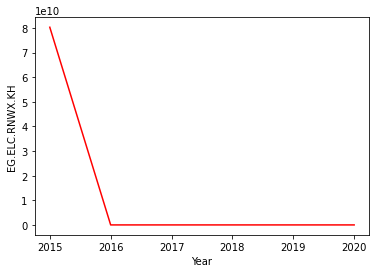

In [15]:
plt.plot(txt5["Year"], txt5["EG.ELC.RNWX.KH"],color="red")
plt.xlabel("Year")
plt.ylabel("EG.ELC.RNWX.KH")
plt.show()

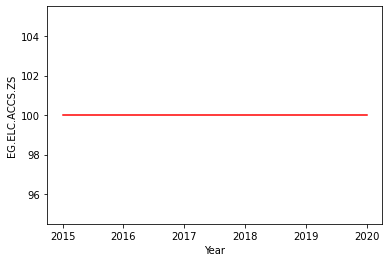

In [16]:
plt.plot(txt5["Year"], txt5["EG.ELC.ACCS.ZS"],color="red")
plt.xlabel("Year")
plt.ylabel("EG.ELC.ACCS.ZS")
plt.show()